In [7]:
library(Seurat)
library(SeuratObject)
library(SeuratDisk)
library(harmony)
library(SeuratWrappers)
library(batchelor)
library(ggplot2)
library(patchwork)
library(dplyr)
library(tidyr)
library(zellkonverter)
library(SingleCellExperiment)

Registered S3 method overwritten by 'zellkonverter':
  method                                             from      
  py_to_r.pandas.core.arrays.categorical.Categorical reticulate



In [4]:
# Input file (h5ad format)
input_path <- "/cellar/users/aklie/projects/igvf/beta_cell_networks/scratch/2026_01_11/integration/results/merged.h5ad"

# Batch key for integration (column in metadata)
integration_key <- "dataset"

# Additional batch key for visualization
batch_key <- "dataset"

# Output directory
output_dir <- "/cellar/users/aklie/projects/igvf/beta_cell_networks/scratch/2026_01_11/integration/results/seurat_integrationR"

# Preprocessing parameters
n_hvgs <- 3000
n_pcs <- 50

# Methods to run (comment out to skip)
methods_to_run <- c("cca", "rpca", "harmony", "fastmnn")

# Clustering resolution
cluster_resolution <- 0.5

In [5]:
# Create output directory
dir.create(output_dir, recursive = TRUE, showWarnings = FALSE)
dir.create(file.path(output_dir, "figures"), showWarnings = FALSE)

cat("Input:", input_path, "\n")
cat("Integration key:", integration_key, "\n")
cat("Output:", output_dir, "\n")

Input: /cellar/users/aklie/projects/igvf/beta_cell_networks/scratch/2026_01_11/integration/results/merged.h5ad 
Integration key: dataset 
Output: /cellar/users/aklie/projects/igvf/beta_cell_networks/scratch/2026_01_11/integration/results/seurat_integrationR 


In [ ]:
# Load
adata.sce <- readH5AD(input_path)
adata.sce

In [ ]:
# Create a seurat object
cat("Creating Seurat object...\n")
counts <- assay(adata.sce, 'X')
col.data <- as.data.frame(colData(adata.sce))
row.data <- rowData(adata.sce)
seurat_obj <- CreateSeuratObject(
    counts = counts,
    project = "beta_cell_networks",
    meta.data = col.data,
    assay = "RNA",
)

cat("Cells:", ncol(seurat_obj), "\n")
cat("Genes:", nrow(seurat_obj), "\n")
cat("Batches (", integration_key, "): ", length(unique(seurat_obj[[integration_key, drop = TRUE]])), "\n", sep = "")

Creating Seurat object...
Cells: 372480 
Genes: 36601 
Batches (dataset): 2


In [ ]:
# Inspect metadata
head(seurat_obj@meta.data)

# Cells per batch
table(seurat_obj[[integration_key, drop = TRUE]])

,orig.ident,nCount_RNA,nFeature_RNA,gex_barcode_cellranger,atac_barcode_cellranger,is_cell_cellranger,excluded_reason_cellranger,gex_raw_reads_cellranger,gex_mapped_reads_cellranger,gex_conf_intergenic_reads_cellranger,⋯,doublet_filter,pre_doublet_filter_leiden_1,leiden_1,sample,harmony_round_1_leiden_0.2,harmony_round_1_leiden_0.5,harmony_round_1_leiden_0.8,harmony_round_1_leiden_1.0,cell_type,dataset
,<fct>,<dbl>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
dm11a#AAACAGCCACACAATT-1_igvf_sc-islet_10X-Multiome,beta_cell_networks,2828.466,1474,AAACAGCCACACAATT-1,ACAGCGGGTCGGTTTG-1,1,0,13115,12025,1013,⋯,FALSE,1,3,dm11a,4,5,7,6,SC.beta,igvf_sc-islet_10X-Multiome
dm11a#AAACATGCACTTACAG-1_igvf_sc-islet_10X-Multiome,beta_cell_networks,1825.651,697,AAACATGCACTTACAG-1,CATTTAGGTGACCTTG-1,1,0,17237,16845,872,⋯,FALSE,5,16,dm11a,0,0,0,8,SC.alpha,igvf_sc-islet_10X-Multiome
dm11a#AAACATGCATAGTCAT-1_igvf_sc-islet_10X-Multiome,beta_cell_networks,1564.531,535,AAACATGCATAGTCAT-1,CATTTAGGTGTACCGC-1,1,0,4302,4073,326,⋯,FALSE,0,16,dm11a,2,4,4,4,SC.EC,igvf_sc-islet_10X-Multiome
dm11a#AAACATGCATGAAGTA-1_igvf_sc-islet_10X-Multiome,beta_cell_networks,3288.649,2077,AAACATGCATGAAGTA-1,CATTTAGGTGAGCGAT-1,1,0,67639,65786,3730,⋯,FALSE,2,0,dm11a,1,1,1,0,SC.beta,igvf_sc-islet_10X-Multiome
dm11a#AAACCAACACAATGTT-1_igvf_sc-islet_10X-Multiome,beta_cell_networks,2736.519,1372,AAACCAACACAATGTT-1,CTTTATCGTTAAAGAC-1,1,0,18652,17979,1316,⋯,FALSE,0,4,dm11a,2,4,4,4,SC.EC,igvf_sc-islet_10X-Multiome
dm11a#AAACCAACACAGGATG-1_igvf_sc-islet_10X-Multiome,beta_cell_networks,2063.576,826,AAACCAACACAGGATG-1,CTTTATCGTTTGCTCC-1,1,0,8821,8469,568,⋯,FALSE,3,16,dm11a,0,0,3,3,SC.alpha,igvf_sc-islet_10X-Multiome



              igvf_sc-islet_10X-Multiome 
                                  328420 
Augsornworawat2023_sc-islet_10X-Multiome 
                                   44060 

In [ ]:
cat("Normalizing...\n")
seurat_obj <- NormalizeData(seurat_obj)

cat("Finding variable features...\n")
seurat_obj <- FindVariableFeatures(seurat_obj, nfeatures = n_hvgs)

cat("Scaling...\n")
# Add vars.to.regress if needed: vars.to.regress = c("pct_counts_mt")
seurat_obj <- ScaleData(seurat_obj)

cat("Running PCA...\n")
seurat_obj <- RunPCA(seurat_obj, npcs = n_pcs, verbose = FALSE)

cat("Preprocessing complete\n")

Normalizing...


Normalizing layer: counts



Finding variable features...


Finding variable features for layer counts



Scaling...


Centering and scaling data matrix



Running PCA...
Preprocessing complete


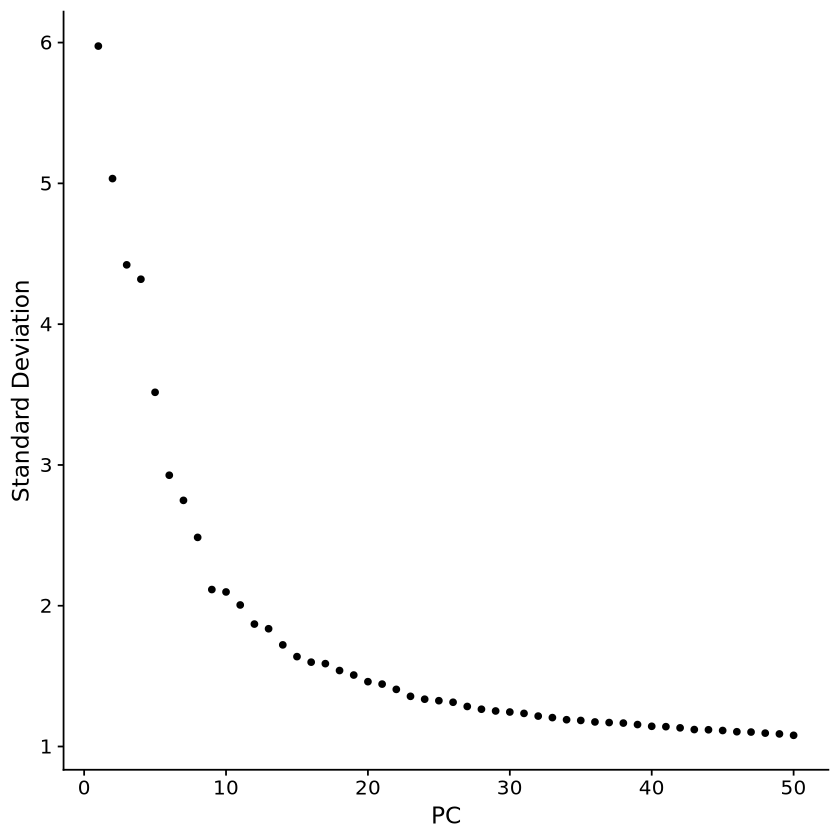

In [ ]:
# Visualize PCA
ElbowPlot(seurat_obj, ndims = n_pcs)

In [ ]:
cat("Computing uncorrected UMAP...\n")
seurat_obj <- FindNeighbors(seurat_obj, reduction = "pca", dims = 1:30)
seurat_obj <- RunUMAP(seurat_obj, reduction = "pca", dims = 1:30,
                       reduction.name = "umap_uncorrected")

Computing uncorrected UMAP...


Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:54:58 UMAP embedding parameters a = 0.9922 b = 1.112

14:54:58 Read 372480 rows and found 30 numeric columns

14:54:58 Using Annoy for neighbor search, n_neighbors = 30

14:54:58 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:56:07 Writing NN index file to temp file /tmp/RtmpE9iqYP/file1a45be6b0ed96b

14:56:08 Searching Annoy index using 1 thread, search_k = 3000

15:00:55 Annoy recall = 100%

15:00:57 Commencing smooth kNN distance 

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



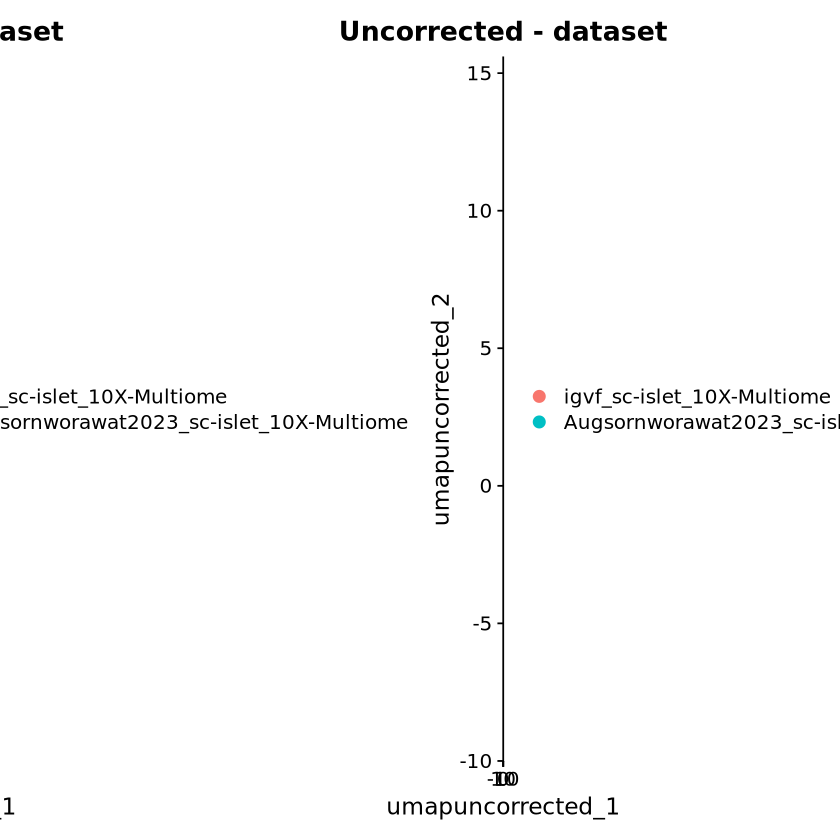

In [ ]:
p1 <- DimPlot(seurat_obj, reduction = "umap_uncorrected", group.by = integration_key) +
  ggtitle(paste("Uncorrected -", integration_key))
p2 <- DimPlot(seurat_obj, reduction = "umap_uncorrected", group.by = batch_key) +
  ggtitle(paste("Uncorrected -", batch_key))

p1 + p2

ggsave(file.path(output_dir, "figures", "umap_uncorrected.png"),
       p1 + p2, width = 14, height = 6)

In [ ]:
cat("Splitting layers by", integration_key, "...\n")

# Ensure integration key is a factor
seurat_obj[[integration_key]] <- as.factor(seurat_obj[[integration_key, drop = TRUE]])

# Split the RNA assay by integration key
seurat_obj[["RNA"]] <- split(seurat_obj[["RNA"]], f = seurat_obj[[integration_key]])

# Re-run preprocessing on split object
seurat_obj <- NormalizeData(seurat_obj)
seurat_obj <- FindVariableFeatures(seurat_obj, nfeatures = n_hvgs)
seurat_obj <- ScaleData(seurat_obj)
seurat_obj <- RunPCA(seurat_obj, npcs = n_pcs, reduction.name = "pca", verbose = FALSE)

cat("Split complete. Layers:", names(seurat_obj[["RNA"]]@layers), "\n")

Splitting layers by dataset ...


Splitting ‘counts’, ‘data’ layers. Not splitting ‘scale.data’. If you would like to split other layers, set in `layers` argument.



ERROR: Error in `[.data.frame`(f, cells): undefined columns selected


In [ ]:
if ("cca" %in% methods_to_run) {
  cat("Running CCA integration...\n")

  seurat_obj <- IntegrateLayers(
    object = seurat_obj,
    method = CCAIntegration,
    orig.reduction = "pca",
    new.reduction = "integrated_cca",
    verbose = FALSE
  )

  cat("CCA complete\n")
} else {
  cat("Skipping CCA\n")
}

In [ ]:
## RPCA Integration

In [ ]:
if ("rpca" %in% methods_to_run) {
  cat("Running RPCA integration...\n")

  seurat_obj <- IntegrateLayers(
    object = seurat_obj,
    method = RPCAIntegration,
    orig.reduction = "pca",
    new.reduction = "integrated_rpca",
    verbose = FALSE
  )

  cat("RPCA complete\n")
} else {
  cat("Skipping RPCA\n")
}
```
## Harmony Integration

```{r harmony-integration}
if ("harmony" %in% methods_to_run) {
  cat("Running Harmony integration...\n")

  seurat_obj <- IntegrateLayers(
    object = seurat_obj,
    method = HarmonyIntegration,
    orig.reduction = "pca",
    new.reduction = "integrated_harmony",
    verbose = FALSE
  )

  cat("Harmony complete\n")
} else {
  cat("Skipping Harmony\n")
}
```

## FastMNN Integration

```{r fastmnn-integration}
if ("fastmnn" %in% methods_to_run) {
  cat("Running FastMNN integration...\n")

  seurat_obj <- IntegrateLayers(
    object = seurat_obj,
    method = FastMNNIntegration,
    orig.reduction = "pca",
    new.reduction = "integrated_mnn",
    verbose = FALSE
  )

  cat("FastMNN complete\n")
} else {
  cat("Skipping FastMNN\n")
}
```

# Join Layers and Compute UMAPs

```{r join-layers}
cat("Joining layers...\n")
seurat_obj <- JoinLayers(seurat_obj)
```

```{r compute-umaps}
# Define reductions to process
reductions_to_process <- c(
  "integrated_cca" = "umap_cca",
  "integrated_rpca" = "umap_rpca",
  "integrated_harmony" = "umap_harmony",
  "integrated_mnn" = "umap_mnn"
)

for (red_name in names(reductions_to_process)) {
  if (red_name %in% names(seurat_obj@reductions)) {
    umap_name <- reductions_to_process[[red_name]]
    cat("Computing UMAP for", red_name, "->", umap_name, "\n")

    seurat_obj <- FindNeighbors(seurat_obj, reduction = red_name, dims = 1:30)
    seurat_obj <- RunUMAP(seurat_obj, reduction = red_name, dims = 1:30,
                           reduction.name = umap_name)
  }
}

cat("UMAPs computed\n")
```

# Compare Integration Methods

```{r comparison-plots, fig.width=16, fig.height=12}
# Collect available UMAP reductions
available_umaps <- c("umap_uncorrected")
umap_labels <- c("Uncorrected")

if ("umap_cca" %in% names(seurat_obj@reductions)) {
  available_umaps <- c(available_umaps, "umap_cca")
  umap_labels <- c(umap_labels, "CCA")
}
if ("umap_rpca" %in% names(seurat_obj@reductions)) {
  available_umaps <- c(available_umaps, "umap_rpca")
  umap_labels <- c(umap_labels, "RPCA")
}
if ("umap_harmony" %in% names(seurat_obj@reductions)) {
  available_umaps <- c(available_umaps, "umap_harmony")
  umap_labels <- c(umap_labels, "Harmony")
}
if ("umap_mnn" %in% names(seurat_obj@reductions)) {
  available_umaps <- c(available_umaps, "umap_mnn")
  umap_labels <- c(umap_labels, "FastMNN")
}

# Create comparison plots colored by integration key
plots_batch <- lapply(seq_along(available_umaps), function(i) {
  DimPlot(seurat_obj, reduction = available_umaps[i], group.by = integration_key,
          pt.size = 0.1) +
    ggtitle(umap_labels[i]) +
    theme(legend.position = "none")
})

# Combine plots
comparison_plot <- wrap_plots(plots_batch, ncol = 3)
comparison_plot

ggsave(file.path(output_dir, "figures", "method_comparison_batch.png"),
       comparison_plot, width = 16, height = 12)
```

```{r comparison-by-dataset, fig.width=16, fig.height=12}
# Create comparison plots colored by dataset
plots_dataset <- lapply(seq_along(available_umaps), function(i) {
  DimPlot(seurat_obj, reduction = available_umaps[i], group.by = batch_key,
          pt.size = 0.1) +
    ggtitle(umap_labels[i]) +
    theme(legend.position = "none")
})

comparison_plot2 <- wrap_plots(plots_dataset, ncol = 3)
comparison_plot2

ggsave(file.path(output_dir, "figures", "method_comparison_dataset.png"),
       comparison_plot2, width = 16, height = 12)
```

# Clustering (per method)

```{r clustering}
# Cluster on each integrated reduction
for (i in seq_along(available_umaps)) {
  red_name <- available_umaps[i]
  label <- tolower(gsub("umap_", "", red_name))

  # Use corresponding integrated reduction for neighbors
  if (red_name == "umap_uncorrected") {
    neighbors_red <- "pca"
  } else {
    neighbors_red <- paste0("integrated_", label)
    if (label == "mnn") neighbors_red <- "integrated_mnn"
  }

  if (neighbors_red %in% names(seurat_obj@reductions)) {
    cat("Clustering for", label, "\n")
    seurat_obj <- FindNeighbors(seurat_obj, reduction = neighbors_red, dims = 1:30)
    seurat_obj <- FindClusters(seurat_obj, resolution = cluster_resolution)

    # Rename cluster column
    cluster_col <- paste0("clusters_", label)
    seurat_obj[[cluster_col]] <- seurat_obj$seurat_clusters
  }
}
```

```{r plot-clusters, fig.width=16, fig.height=12}
# Plot clusters for each method
cluster_cols <- grep("^clusters_", colnames(seurat_obj@meta.data), value = TRUE)

if (length(cluster_cols) > 0) {
  plots_clusters <- lapply(seq_along(available_umaps), function(i) {
    label <- tolower(gsub("umap_", "", available_umaps[i]))
    cluster_col <- paste0("clusters_", label)

    if (cluster_col %in% colnames(seurat_obj@meta.data)) {
      DimPlot(seurat_obj, reduction = available_umaps[i], group.by = cluster_col,
              pt.size = 0.1, label = TRUE) +
        ggtitle(paste(umap_labels[i], "- Clusters")) +
        theme(legend.position = "none")
    } else {
      ggplot() + theme_void() + ggtitle(paste(umap_labels[i], "- No clusters"))
    }
  })

  cluster_comparison <- wrap_plots(plots_clusters, ncol = 3)
  cluster_comparison

  ggsave(file.path(output_dir, "figures", "method_comparison_clusters.png"),
         cluster_comparison, width = 16, height = 12)
}
```

# Save Results

```{r save-seurat}
# Save as RDS
rds_path <- file.path(output_dir, "integrated_seurat.rds")
cat("Saving Seurat object to", rds_path, "...\n")
saveRDS(seurat_obj, rds_path)
cat("Done!\n")
```

```{r save-h5seurat}
# Save as h5seurat (can be converted back to h5ad)
h5seurat_out <- file.path(output_dir, "integrated_seurat.h5seurat")
cat("Saving to", h5seurat_out, "...\n")
SaveH5Seurat(seurat_obj, filename = h5seurat_out, overwrite = TRUE)
cat("Done!\n")
```

```{r save-metadata}
# Save cell metadata
metadata_path <- file.path(output_dir, "cell_metadata.tsv")
write.table(seurat_obj@meta.data, metadata_path, sep = "\t", quote = FALSE)
cat("Metadata saved to", metadata_path, "\n")
```

```{r save-embeddings}
# Save embeddings as CSV for use in Python if needed
embeddings_dir <- file.path(output_dir, "embeddings")
dir.create(embeddings_dir, showWarnings = FALSE)

for (red_name in names(seurat_obj@reductions)) {
  embed_path <- file.path(embeddings_dir, paste0(red_name, ".csv"))
  write.csv(Embeddings(seurat_obj, reduction = red_name), embed_path)
  cat("Saved", red_name, "to", embed_path, "\n")
}
```

# Session Info

```{r session-info}
sessionInfo()
```

---

# Summary

Integration complete. Outputs saved to `r output_dir`:

- `integrated_seurat.rds` - Full Seurat object
- `integrated_seurat.h5seurat` - H5Seurat format (convertible to h5ad)
- `cell_metadata.tsv` - Cell metadata with cluster assignments
- `embeddings/` - CSV files with embeddings for each reduction
- `figures/` - Comparison plots

## Available reductions:

```{r list-reductions, echo=FALSE}
cat(paste(names(seurat_obj@reductions), collapse = "\n"))
```

## To convert h5seurat back to h5ad (in R):

```r
Convert("integrated_seurat.h5seurat", dest = "h5ad", overwrite = TRUE)
```

## To load embeddings in Python:

```python
import pandas as pd
import scanpy as sc

# Load original adata
adata = sc.read_h5ad("merged.h5ad")

# Load embeddings
umap_cca = pd.read_csv("embeddings/umap_cca.csv", index_col=0)
adata.obsm["X_umap_cca"] = umap_cca.loc[adata.obs_names].values
```